In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_theta(f, g, cp, cpp, n_0, min_x, max_x):
    xs = np.arange(min_x,max_x,1, dtype='int64')
    fn_ys = f(xs)
    gn_ysp = cp*g(xs)
    gn_yspp = cpp*g(xs)
    plt.axvline(x = n_0, color = 'k', linestyle='--')
    plt.scatter(x=xs, y=fn_ys, marker='x')
    plt.scatter(x=xs, y=gn_ysp, marker='.')
    plt.scatter(x=xs, y=gn_yspp, marker='.')
    plt.xlabel('n')
    plt.ylabel('$\lambda(n)$')
    plt.legend(['n_0 = '+str(n_0),'f(n)', 'c\'g(n)', 'c\'\'g(n)'])
  
    
def plot_oh_incr(f, g, c, n_0, min_x, max_x, incr):
    xs = np.arange(min_x,max_x,incr, dtype='int64')
    fn_ys = f(xs)
    gn_ys = c*g(xs)
    plt.axvline(x = n_0, color = 'k', linestyle='--')
    plt.scatter(x=xs, y=fn_ys, marker='x')
    plt.scatter(x=xs, y=gn_ys, marker='.')
    plt.xlabel('n')
    plt.ylabel('$\lambda(n)$')
    plt.legend(['n_0 = '+str(n_0),'f(n)', 'cg(n)'])
    
def plot_oh(f, g, c, n_0, min_x, max_x):
    plot_oh_incr(f, g, c, n_0, min_x, max_x, 1)

## Big-Oh Definition
Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } O(g(n))$ if and only if there exists positive constants $c$ and $n_0$ such that: $$f(n) \leq c \cdot g(n), \forall n \geq n_0$$

## Big-Oh Using Rules

**Drop smaller terms rule:** 

If $f(n) = (1 + h(n))$ and $h(n) \rightarrow 0$ as $n \rightarrow \infty$, then $f(n)$ is $O(1)$

### Q1. Prove that $n^3 + 2n^2$ is $O(n^3)$ using the multiplication and drop smaller terms rules

**Solution**

* $n^3 + 2n^2$

Take $n^3$ outside of the brackets and simplify:
* $n^3(1 + \frac{2n^2}{n^3})$
* $n^3(1 + \frac{2}{n})$

$\frac{2}{n} \rightarrow 0$ as $n \rightarrow \infty$ - see the plot below. Therefore, by the *drop smaller terms* rule, we get:
* $n^3(1) = O(n^3)$

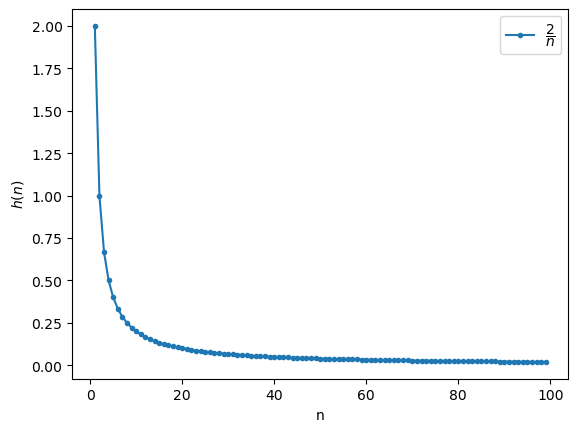

In [3]:
xs = np.arange(1,100,1, dtype='int64')
h = lambda n: 2 / (n)
ys = h(xs)

plt.plot(xs,ys, marker='.')
plt.xlabel('n')
plt.ylabel('$h(n)$')
plt.legend(['$\dfrac{2}{n}$'])

### Q2. Prove that $n^3 + 2n^2 log(n)$ is $O(n^3)$ using the multiplication and drop smaller terms rules

**Solution**

* $n^3 + 2n^2 log(n)$

Take $n^3$ outside of the brackets and simplify:
* $n^3(1 + \frac{2n^2 log(n)}{n^3})$
* $n^3(1 + \frac{2log(n)}{n})$

$\frac{2log(n)}{n} \rightarrow 0$ as $n \rightarrow \infty$ - see the plot below. Therefore, by the *drop smaller terms* rule, we get:
* $n^3(1) = O(n^3)$

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pszrt\AppData\Local\Temp\ipykernel_21128\1755078406.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.legend(['$\dfrac{2log_2n}{n}$'])


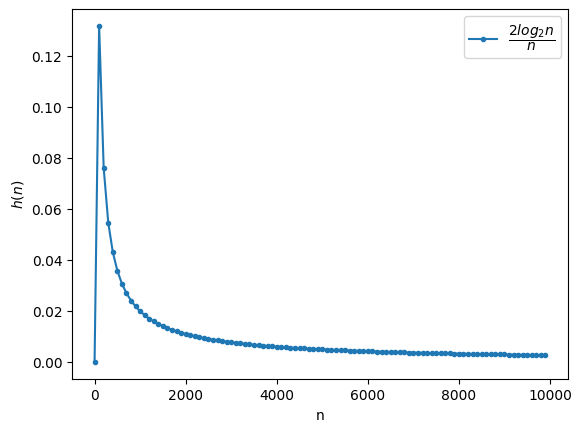

In [4]:
xs = np.arange(1,10000,100, dtype='int64')
h = lambda n: (2*np.log2(n)) / (n)
ys = h(xs)

plt.plot(xs,ys,marker='.')
plt.xlabel('n')
plt.ylabel('$h(n)$')
plt.legend(['$\dfrac{2log_2n}{n}$'])

## Big-Omega and Big-Theta Definitions

**Big-Omega:** Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } \Omega(g(n))$ if and only if there exists strictly positive constants $c$ and $n_0$ such that:
$$f(n) \geq c \cdot g(n), \forall n \geq n_0$$

$\Omega$ expresses that a function $f(n)$ grows at least as fast as $g(n)$. 

**Big-Theta:** Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } \Theta(g(n))$ if and only if there exists positive constants $c'$, $c''$ and $n_0$ such that:

$$f(n) \leq c' \cdot g(n), \; f(n) \geq c'' \cdot g(n), \; \forall n \geq n_0$$ 

$\Theta$ expresses that a function $f(n)$ grows exactly as fast as $g(n)$.

### Q3. Prove that $2n + 1$ is $\Omega(3n)$ and hence $2n + 1$ is $\Theta(3n)$

**Solution**

***We start by proving $f(n)$ is $\Omega(3n)$:***

We can say that $2n+1 \text{ is } \Omega(3n)$ if and only if there exists strictly positive constants $c$ and $n_0$ such that $2n+1 \geq c \cdot 3n, \forall n \geq n_0$.

We are allowed to choose any real value of $c>0$.<br/>
The trick is to choose a fractional value of $c$ before we simplify.

* $2n+1 \geq c \cdot 3n, \forall n \geq n_0$
* $2n+1 \geq \frac{1}{3} \cdot 3n, \forall n \geq n_0$ (here I am trying to make the $3n$ smaller than $2n$)
* $2n+1 \geq n, \forall n \geq n_0$ (subtract $n$)
* $n+1 \geq 0, \forall n \geq n_0$ (pick $n_0 = 1$)
* $n+1 \geq 0, \forall n \geq 1$ (trivially true)
* $\therefore 2n+1$ is $\Omega(3n)$ with $c= \frac{1}{3}$ and $n_0=1$.

***Then continue with $f(n)$ is $\Theta(n)$ using $c^{''}$ and $n_0$ from the proof for Omega:***

**Big-Theta:** Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } \Theta(g(n))$ if and only if there exists positive constants $c'$, $c''$ and $n_0$ such that:

$$f(n) \leq c' \cdot g(n), \; f(n) \geq c'' \cdot g(n), \; \forall n \geq n_0$$ 

...which gives: $2n+1 \leq c' \cdot 3n, \; 2n+1 \geq \frac{1}{3} \cdot 3n, \; \forall n \geq 1$

...which can be trivially satisfied with $c^{'}=1$.

$2n+1 \leq 3n, \; 2n+1 \geq n, \; \forall n \geq 1$

$\therefore 2n+1$ is $\Theta(3n)$ using $c^{'}=1, c^{''}=\frac{1}{3}, n_0=1$.

**Plot $\Omega$**

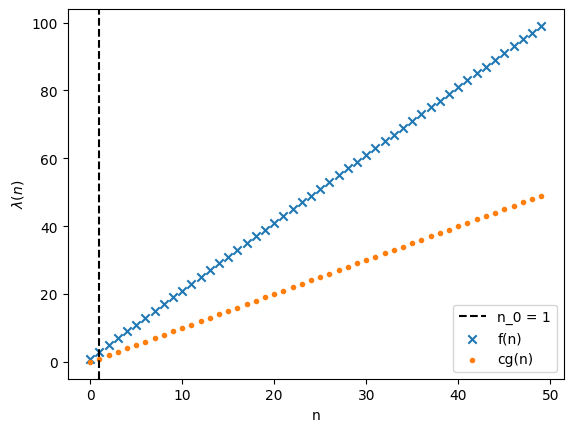

In [5]:
c = 1/3.0
n_0 = 1
f = lambda n: (2*n+1)
g = lambda n: (3*n)

plot_oh(f, g, c, n_0, 0, 50)

**Plot $\Theta$**

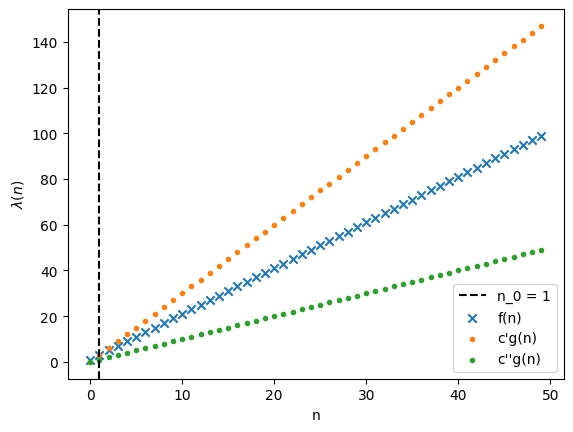

In [6]:
cp = 1
cpp = 1/3.0
n_0 = 1
f = lambda n: 2*n+1
g = lambda n: 3*n

plot_theta(f, g, cp, cpp, n_0, 0, 50)

## Big-Omega/Big-Theta Questions: Basics

### Q4. Prove that 5 is $\Omega(1)$, and hence 5 is $\Theta(1)$

**Solution**

We can say that $5 \text{ is } \Omega(1)$ if and only if there exists strictly positive constants $c$ and $n_0$ such that $5 \geq c \cdot 1, \forall n \geq n_0$.

* $5 \geq c \cdot 1, \forall n \geq n_0$
* $5 \geq 1, \forall n \geq n_0$ (choose a $c\leq5$, e.g. $c=1$)
* $5 \geq 1, \forall n \geq 1$ (which is always true, choose an artbitrary value for $n_0$)

$\therefore 5$ is $\Omega(1)$ using $c=1, n_0=1$.

Using $c'' = c$ and the same $n_0$ we just need to show the $\leq$ case for $\Theta$.

* $5 \leq c^{'} \cdot 1, \forall n \geq 1$
* $5 \leq 5, \forall n \geq 1$ (choose $c^{'}=5$)

$\therefore 5$ is also $\Theta(1)$ using $c^{'} = 5, c^{''} = 1, n_0=1$.

### Q5. Prove that $4$ is $\Omega(2)$, and hence $4$ is $\Theta(2)$

**Solution**

We can say that $4 \text{ is } \Omega(2)$ if and only if there exists strictly positive constants $c$ and $n_0$ such that $4 \geq c \cdot 2, \forall n \geq n_0$.

* $4 \geq c \cdot 2, \forall n \geq n_0$
* $4 \geq 1 \cdot 2, \forall n \geq n_0$ (choose $c=1$)
* $4 \geq 2, \forall n \geq n_0$
* $4 \geq 2, \forall n \geq 1$ (choose an arbitrary value for $n_0$)

$\therefore 4 \text{ is } \Omega(2)$

Using $c'' = c$, we just need to show the $\leq$ case for $\Theta$.

* $4 \leq c' \cdot 2, \forall n \geq 1$
* $4 \leq 5 \cdot 2, \forall n \geq 1$ (choose a large enough value for $c'$)
* $4 \leq 10, \forall n \geq 1$

$\therefore 4 \text{ is also } \Theta(2)$ using $c' = 5, c'' = 1, n_0 = 1$

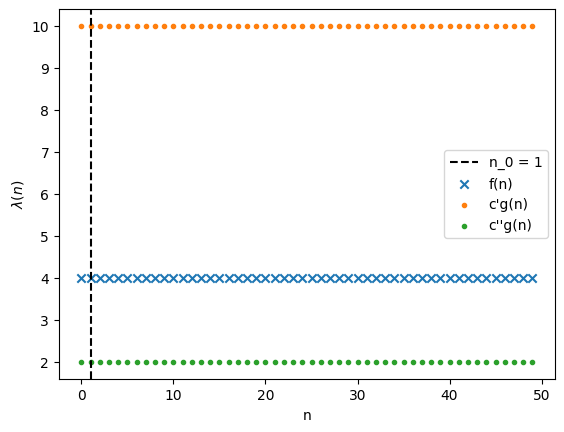

In [7]:
cp = 5
cpp = 1
n_0 = 1
f = lambda n: (n*0+4)
g = lambda n: (n*0+2)

plot_theta(f, g, cp, cpp, n_0, 0, 50)

### Q6. Prove that $2n+1$ is $\Omega(n)$, and hence $2n+1$ is $\Theta(n)$


**Solution**

We can say that $2n+1 \text{ is } \Omega(n)$ if and only if there exists strictly positive constants $c$ and $n_0$ such that $2n+1 \geq c \cdot n, \forall n \geq n_0$.

* $2n+1 \geq c \cdot n, \forall n \geq n_0$

Choose $c=1$ and pick $n_0 = 1$.

* $2n+1\geq n, \forall n \geq 1$
* $n+1\geq 0, \forall n \geq 1$

$\therefore 2n+1 \text{ is } \Omega(n)$

Now to complete the question!

* $2n+1\leq c' \cdot n, \forall n \geq 1$
* $2n+1 \leq 3n, \forall n \geq 1$ (choose $c^{'} = 3$)
* $1 \leq n, \forall n \geq 1$

$\therefore 2n+1 \text{ is also } \Theta(n)$ with $c^{'}=3, c^{''}=1, n_0 = 1$


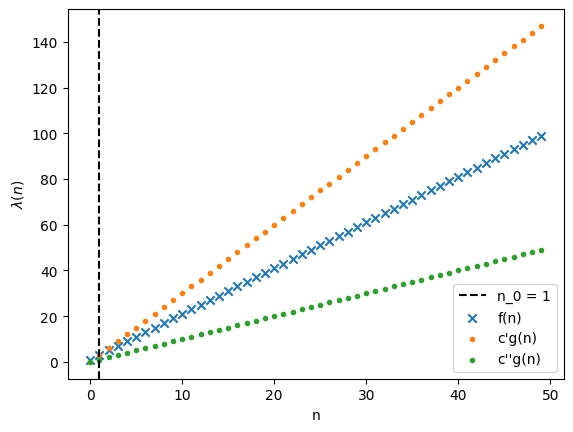

In [8]:
cp = 3
cpp = 1
n_0 = 1
f = lambda n: (2*n+1)
g = lambda n: (n)

plot_theta(f, g, cp, cpp, n_0, 0, 50)

## Big-Omega/Big-Theta Questions: Medium Difficulty

### Q7. Prove that $n^2$ is $\Omega(2n^2)$

**Solution**

*Definition*

Given the functions $f(n)$ and $g(n)$, $f(n)$ is $\Omega(g(n))$ if there exists strictly positive constants $c$ and $n_0$ such that $f(n)\geq c\cdot g(n), \forall n \geq n_0$.

*Proof*

* $n^2 \geq c \cdot 2n^2, \forall n \geq n_0$
* $n \geq c \cdot 2n, \forall n \geq n_0$

Get rid of the $2$ by choosing $c=0.5$

* $n \geq \frac{1}{2}2n, \forall n \geq n_0$
* $n \geq n, \forall n \geq n_0$
* $n \geq n, \forall n \geq 1$ (trivial, remember to pick an $n_0$)

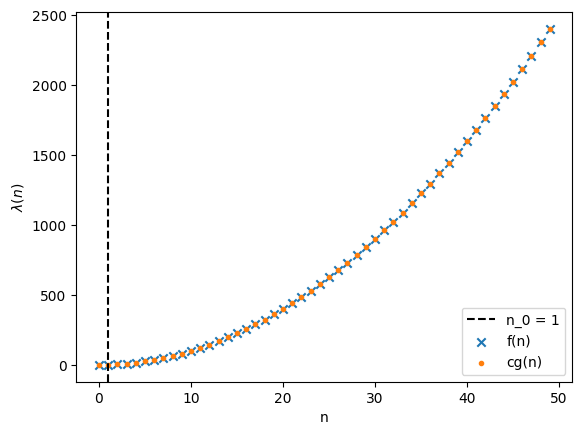

In [9]:
c = 0.5
n_0 = 1
f = lambda n: n**2
g = lambda n: 2*n**2

plt.figure()
plot_oh(f, g, c, n_0, 0, 50)

### Q8. Prove that $n^2-3$ is $\Omega(n^2)$

**Solution**

*Definition*

Given the functions $f(n)$ and $g(n)$, $f(n)$ is $\Omega(g(n))$ if there exists strictly positive constants $c$ and $n_0$ such that $f(n)\geq c\cdot g(n), \forall n \geq n_0$.

*Proof*

* $n^2-3 \geq c \cdot n^2, \forall n \geq n_0$
* $n^2 - c \cdot n^2 \geq 3, \forall n \geq n_0$

Trivially choose $c < 1$ and find a suitable $n_0$.

* $n^2 - \frac{1}{2} \cdot n^2 \geq 3, \forall n \geq n_0$
* $\frac{1}{2} \cdot n^2 \geq 3, \forall n \geq n_0$
* $n^2 \geq 6, \forall n \geq n_0$

$\sqrt 6 = 2.449$, hence need to pick an $n_0 > 2.449$

* $n^2 \geq 6, \forall n \geq 3$

$\therefore n^2-3$ is $\Omega(n^2)$ using $c=0.5, n_0=3$

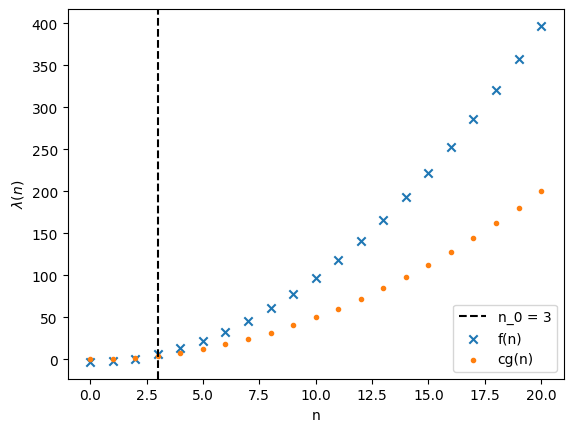

In [10]:
c = 0.5
n_0 = 3
f = lambda n: n**2-3
g = lambda n: n**2

plt.figure()
plot_oh(f, g, c, n_0, 0, 21)

### Q9. Prove that $n^2-5n$ is $\Omega(n^2)$, and hence is $\Theta(n^2)$

**Solution**

***Definition***

Given the functions $f(n)$ and $g(n)$, $f(n)$ is $\Omega(g(n))$ if there exists strictly positive constants $c$ and $n_0$ such that $f(n)\geq c\cdot g(n), \forall n \geq n_0$.

***Proof***

* $n^2-5n\geq c\cdot n^2, \forall n \geq n_0$
* $n-5\geq c\cdot n, \forall n \geq n_0$
* $n - c\cdot n \geq 5, \forall n \geq n_0$
* $\frac{1}{2}n\geq 5, \forall n \geq n_0$ (Choose $c < 1$ for example $c=0.5$)
* $\frac{1}{2}n\geq 5, \forall n \geq 10$ (Rearranging gives $n \geq 10$, choose $n_0=10$)

$\therefore n^2-5n$ is $\Omega(n^2)$ using $c=0.5, n_0=10$

Need to show for Big-Theta!

Using $c''=0.5$ and $n_0 = 10$ we just need to show that $n^2-5n \leq c' \cdot n^2, \forall n \geq 10$

* $n^2-5n \leq c' \cdot n^2, \forall n \geq 10$
* $n-5 \leq c' \cdot n, \forall n \geq 10$ (divide by $n$)
* $n \leq n + 5, \forall n \geq 10$ (add $5$ to both sides and choose $c^{'}=1$)
* $0 \leq 5, \forall n \geq 10$ (subtract $n$)

$\therefore n^2-5n \text{ is also } \Theta(n^2)$ using $c' = 1, c'' = 0.5, n_0 = 10$

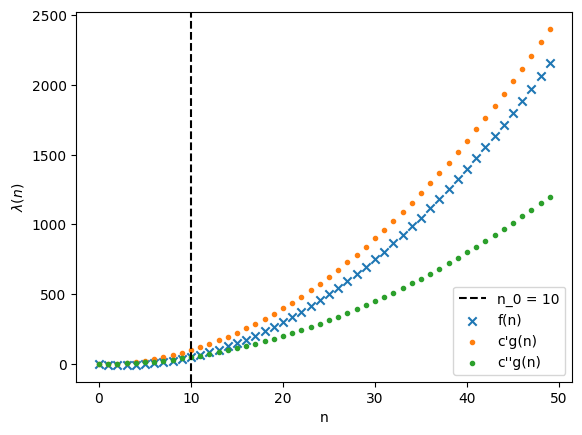

In [11]:
cp = 1
cpp = 0.5
n_0 = 10
f = lambda n: n**2-5*n
g = lambda n: n**2

plot_theta(f, g, cp, cpp, n_0, 0, 50)

### Q10. Prove that $n^2 + 1$ is $\Omega(n^2)$

**Solution**

***Definition***

Given the functions $f(n)$ and $g(n)$, $f(n)$ is $\Omega(g(n))$ if there exists strictly positive constants $c$ and $n_0$ such that $f(n)\geq c\cdot g(n), \forall n \geq n_0$.

***Proof***

* $n^2 + 1 \geq c\cdot n^2, \forall n \geq n_0$
* $n^2 + 1 \geq n^2, \forall n \geq n_0$
* $1 \geq 0, \forall n \geq 1$

$\therefore n^2 + 1$ is $\Omega(n^2)$ using $c=1, n_0=1$

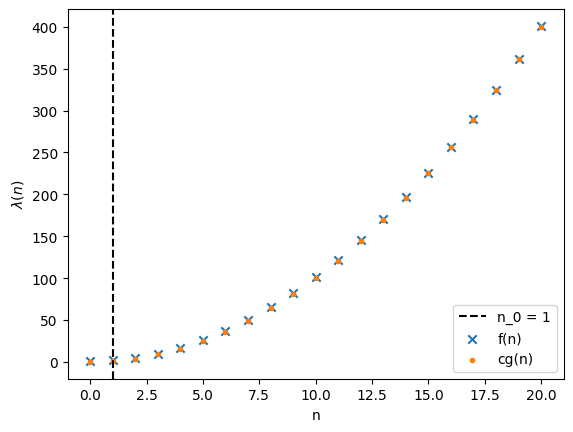

In [12]:
c = 1
n_0 = 1
f = lambda n: n**2+1
g = lambda n: n**2

plt.figure()
plot_oh(f, g, c, n_0, 0, 21)

## Little-Oh Definition

Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } o(g(n))$ if **for all positive real constants $c > 0$** there exists $n_0$ such that:

$$f(n) < c \cdot g(n), \forall n \geq n_0$$

**<u>Important:</u>** 
$c \in \mathbb{R}^+_*$ where $\mathbb{R}^+_* = \{x \in \mathbb{R} | x > 0\}$

### Q11. Prove or disprove that 5 is $o(1)$

Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } o(g(n))$ if **for all positive real constants $c > 0$** there exists $n_0$ such that $f(n) < c \cdot g(n), \forall n \geq n_0$.

* $5 < c \cdot 1, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 

This is not valid for all $0 < c < 5$ hence it is disproven that $5$ is $o(1)$.

### Q12. Prove or disprove that 5 is $o(n)$

Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } o(g(n))$ if **for all positive real constants $c > 0$** there exists $n_0$ such that $f(n) < c \cdot g(n), \forall n \geq n_0$.

* $5 < c \cdot n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $\frac{5}{c} < n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 

Since we have $\forall c > 0, \exists n_0 > 0$ we can pick an $n_0$ that depends on $c$.
Since we have that $n > \frac{5}{c}$, trivially choose $n_0 = \frac{5}{c} + 1$

* $\frac{5}{c} < n, \forall c > 0, \exists n_0 > 0, \forall n > \frac{5}{c} + 1$ 

$\therefore 5$ is $o(n)$ using $n_0=\frac{5}{c} + 1$

## Little-Oh Questions

### Q13. Prove or disprove that $n$ is $o(n^2)$

Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } o(g(n))$ if **for all positive real constants $c > 0$** there exists $n_0$ such that $f(n) < c \cdot g(n), \forall n \geq n_0$.

* $n < c \cdot n^2, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $1 < c \cdot n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ (divide both sides by $n$)
* $\frac{1}{c} < n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ (divide both sides by $c$)

Since we have $\forall c > 0, \exists n_0 > 0$ we can pick an $n_0$ that depends on $c$.
Since we have that $n > \frac{1}{c}$, trivially choose $n_0 = \frac{1}{c} + 1$

* $\frac{1}{c} < n, \forall c > 0, \exists n_0 > 0, \forall n > \frac{1}{c} + 1$ 

$\therefore n$ is $o(n^2)$ using $n_0=\frac{1}{c} + 1$

### Q14. Prove or disprove that $1$ is $o(log\;n)$

Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } o(g(n))$ if **for all positive real constants $c > 0$** there exists $n_0$ such that $f(n) < c \cdot g(n), \forall n \geq n_0$.

* $1 < c \cdot log\;n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $\frac{1}{c} < log\;n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$

To isolate $n$ on the right hand side, we can do $2^x$ for both sides - this allows us to eliminate the $log$ on the right. Remember that if the log base is not specified, assume we are using a base of 2.

* $2^{\frac{1}{c}} < 2^{log\;n}, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $2^{\frac{1}{c}} < n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$

Since we have $\forall c > 0, \exists n_0 > 0$ we can pick an $n_0$ that depends on $c$.
Since we have that $n > 2^{\frac{1}{c}}$, trivially choose $n_0 = 2^{\frac{1}{c}} + 1$

* $2^{\frac{1}{c}} < n, \forall c > 0, \exists n_0 > 0, \forall n > 2^{\frac{1}{c}} + 1$ 

$\therefore 1$ is $o(log\;n)$ using $n_0=2^{\frac{1}{c}} + 1$

### Q15. Prove or disprove that $log\;n$ is $o(1)$

Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } o(g(n))$ if **for all positive real constants $c > 0$** there exists $n_0$ such that $f(n) < c \cdot g(n), \forall n \geq n_0$.

* $log\;n < c \cdot 1, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $log\;n < c, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $2^{log\;n} < 2^c, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $n < 2^c, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 

No matter the value we choose for $n_0$, for any $n > 2^c$ the inequality will fail. We therefore don't satisfy the condition that it must work $\forall n > n_0$, hence it is disproven that $log\;n$ is $o(1)$.

## Additional Practice Questions (more challenging)

### Q16. Prove or disprove that $1$ is $\Omega(n)$

* $1 \geq c \cdot n, \forall n \geq n_0$

Choose $c=1$

* $1 \geq n, \forall n \geq n_0$

Here, 1 ends up as an upperbound on the value of $n$. Any value chosen for $c$ and $n_0$ will still lead to this inequality failing for larger values of $n$. We therefore don't satisfy the condition that it must work $\forall n > n_0$, hence it is disproven.

### Q17. Prove or disprove that $n$ is $\Omega(1)$

* $n \geq c\cdot 1, \forall n \geq n_0$
* $n \geq 1, \forall n \geq n_0$
* $n \geq 1, \forall n \geq 1$

$\therefore n$ is $\Omega(1)$ using $c=1, n_0=1$

### Q18. Prove or disprove that $n^2$ is $\Omega(n)$

* $n^2 \geq c\cdot n, \forall n \geq n_0$
* $n \geq c, \forall n \geq n_0$
* $n \geq 1, \forall n \geq n_0$
* $n \geq 1, \forall n \geq 1$

$\therefore n^2$ is $\Omega(n)$ using $c=1, n_0=1$

### Q19. Prove or disprove that $n$ is $o(n\;log\;n)$

Given positive functions $f(n)$ and $g(n)$, we can say that $f(n) \text{ is } o(g(n))$ if **for all positive real constants $c > 0$** there exists $n_0$ such that $f(n) < c \cdot g(n), \forall n \geq n_0$.

* $n < c \cdot n\;log\;n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $1 < c \cdot log\;n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $\frac{1}{c} < log\;n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$

To isolate $n$ on the right hand side, we can do $2^x$ for both sides - this allows us to eliminate the $log$ on the right. Remember that if the log base is not specified, assume we are using a base of 2.

* $2^{\frac{1}{c}} < 2^{log\;n}, \forall c > 0, \exists n_0 > 0, \forall n > n_0$ 
* $2^{\frac{1}{c}} < n, \forall c > 0, \exists n_0 > 0, \forall n > n_0$

Since we have $\forall c > 0, \exists n_0 > 0$ we can pick an $n_0$ that depends on $c$.
Since we have that $n > 2^{\frac{1}{c}}$, trivially choose $n_0 = 2^{\frac{1}{c}} + 1$

* $2^{\frac{1}{c}} < n, \forall c > 0, \exists n_0 > 0, \forall n > 2^{\frac{1}{c}} + 1$ 

$\therefore n$ is $o(n\;log\;n)$ using $n_0=2^{\frac{1}{c}} + 1$

### Q20. Given that $f(n) = n^2$ if $n$ is even, and $f(n) = n$ if $n$ is odd. From the definitions, find the $O$ and $\Omega$ behaviours of $f(n)$.

Warning: be careful to find a single $c$ that works for all $n$, not separate $c$ for even and odd $n$

Big-Oh is the worst case, and for $f(n)$ the worst case is "$n^2$ if $n$ is even". So we prove $f(n)$ is $O(n^2)$.

* $f(n) \leq c \cdot n^2, \forall n \geq n_0$
* Even case: $n^2 \leq c \cdot n^2, \forall n \geq n_0$
* Odd case: $n \leq c \cdot n^2, \forall n \geq n_0$

Choose $c=1$:

* Even case: $n^2 \leq n^2, \forall n \geq n_0$
* Odd case: $n \leq n^2, \forall n \geq n_0$

Both of these statements are trivially true, so we can just choose $n_0=1$.

$\therefore f(n)$ is $O(n^2)$.

You may then assume it is also $\Omega(n^2)$; however, you would need to find some $c$ and $n_0$ such that $f(n) \geq c \cdot n^2, \forall n \geq n_0$.

But this would fail for the cases where $n$ is odd. 

It is important to understand the difference between this and the function $n^2+n$, which is $\Omega(n^2)$.

Instead, we can prove $f(n)$ is $\Omega(n)$:

* $f(n) \geq c \cdot n, \forall n \geq n_0$
* Even case: $n^2 \geq c \cdot n, \forall n \geq n_0$
* Odd case: $n \geq c \cdot n, \forall n \geq n_0$

Choose $c=1$:

* Even case: $n^2 \geq n, \forall n \geq n_0$
* Odd case: $n \geq n, \forall n \geq n_0$

Again, both of these statements are trivially true, so we can just choose $n_0=1$.

$\therefore f(n)$ is $\Omega(n)$.

### Q21. Prove or disprove that $n\;log\;n$ is $o(n^2)$